In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from birdbrain.atlas import atlas
from birdbrain.utils import um_to_vox
import numpy as np
from birdbrain.visualization.plotting_2d import plot_location_coordinates

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Load data, create atlas object

In [6]:
dset_dir = '/mnt/cube/Datasets/ATLAS_starling/'

starling_atlas = atlas(
    dset_dir = dset_dir,
    um_mult = 100,
    smoothing = ['Brain', 'Nuclei']
)

qform_code 32 not valid; setting to 0
qform_code 32 not valid; setting to 0


Getting voxel data from .img files...


qform_code 32 not valid; setting to 0
qform_code 32 not valid; setting to 0


Loading brain labels...
Getting location for each nucleus/region from voxel data...


Atlas created


In [7]:
# update y-sinus coordiates based upon notebook 0
updated_y_sinus = {'medial-lateral': 128, 'posterior-anterior': 98, 'ventral-dorsal': 205}
starling_atlas.update_y_sinus(updated_y_sinus)

10737.5 -6837.5 -17437.5


### Smooth over voxel labels
- voxel labels seem to be pretty noisy so smoothing might make some sense
- higher sigma = more smoothing

#### List of locations that can be plotted

In [8]:
print(list(starling_atlas.region_vox.index))

['Field_L', 'NCM', 'Ov', 'MLd', 'CMM', 'TeO', 'Entopallium', 'Rt', 'HVC', 'Area_X', 'RA', 'DLM', 'MAN', 'Olfactory_Bulb', 'POM', 'TnA', 'GCt', 'LS', 'MS', 'PVN', 'VMH', 'VTA', 'Nidopallium', 'Mesopallium', 'Arcopallium', 'Hyperpallium', 'Hippocampus', 'Striatum', 'Olfactory_Bulb_Brainregions', 'Midbrain', 'Diencephalon', 'Cerebellum', 'Pont', 'TrsM', 'CoA', 'CoP', 'N3', 'OM', 'MFB', 'LFB', 'QF', 'FA', 'Opt', 'DSD', 'HiC', 'y_sinus']


#### Y sinus

{'medial-lateral': 128, 'posterior-anterior': 98, 'ventral-dorsal': 205}


/mnt/cube/tsainbur/Projects/github_repos/birdbrain/birdbrain/visualization/plotting_2d.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  atlas.label_cmap(cnorm(regions_plotted.label.values))


medial-lateral: -0.0um | posterior-anterior: 0.0um | ventral-dorsal: 0.0um


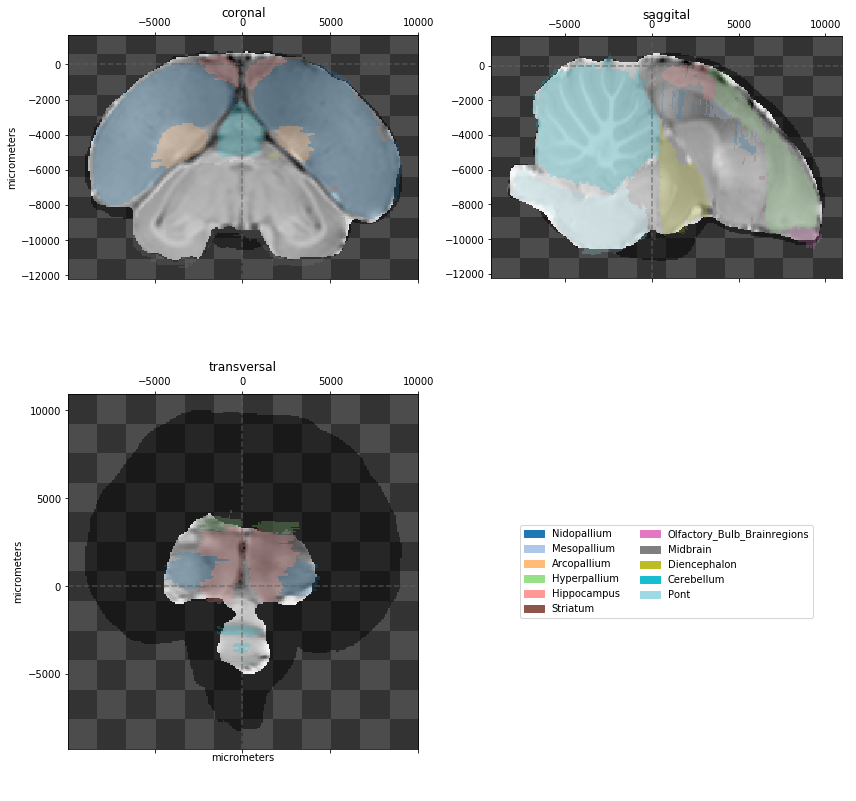

In [10]:
print(updated_y_sinus)
plot_location_coordinates(starling_atlas, updated_y_sinus, "Brainregions", region_alpha = 0.25, zoom =6);

In [11]:
np.shape(starling_atlas.voxel_data.loc['Brainregions', 'voxels'])

(256, 256, 256)

{'medial-lateral': 128, 'posterior-anterior': 98, 'ventral-dorsal': 205}
medial-lateral: -0.0um | posterior-anterior: 0.0um | ventral-dorsal: 0.0um


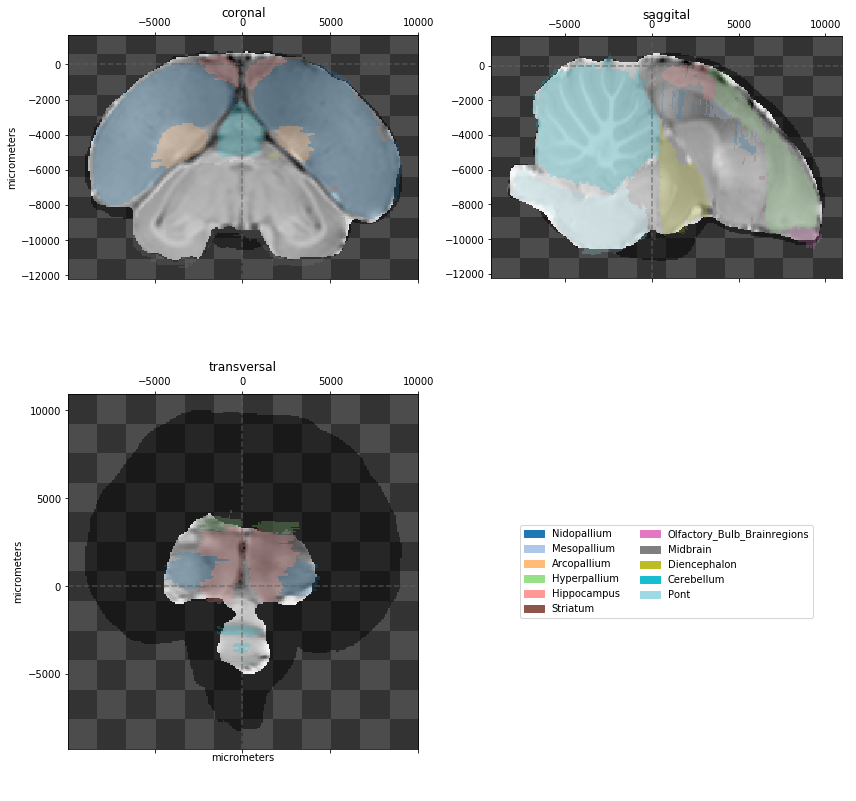

In [12]:
print(updated_y_sinus)
plot_location_coordinates(starling_atlas, updated_y_sinus, "Brainregions", region_alpha = 0.25, zoom =6);

#### HVC

medial-lateral: 2890.0um | posterior-anterior: 425.0um | ventral-dorsal: -85.0um


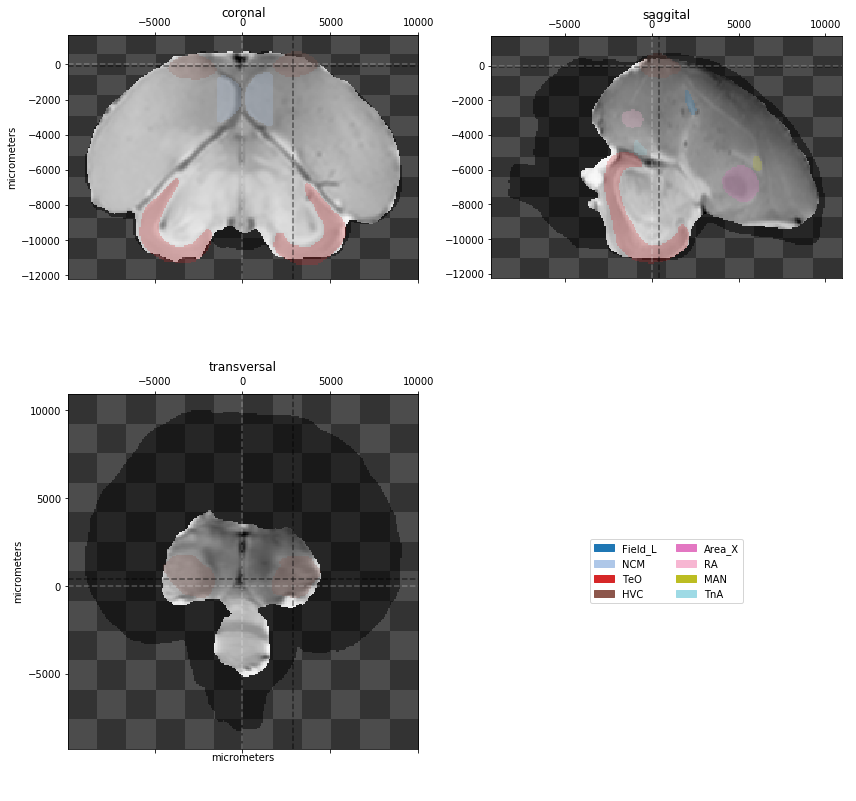

In [13]:
nuc_loc_voxels = starling_atlas.region_vox.loc['HVC', 'coords_vox']
plot_location_coordinates(starling_atlas, nuc_loc_voxels, "Nuclei", region_alpha = 0.25, zoom =6);

#### NCM

medial-lateral: 850.0um | posterior-anterior: 935.0um | ventral-dorsal: -2125.0um


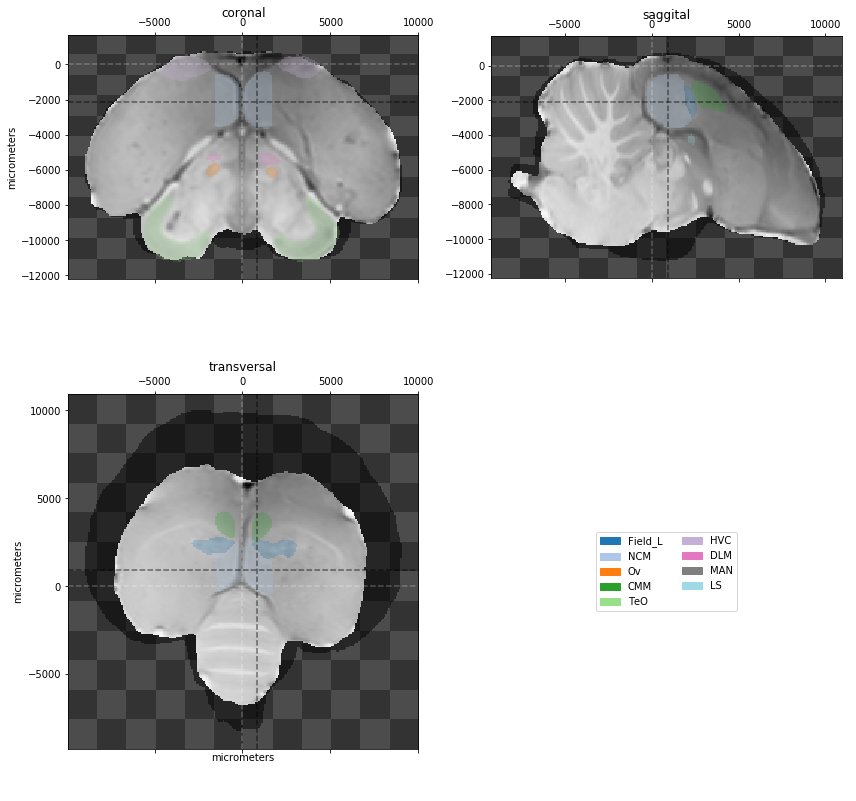

In [14]:
# gentnerlab coordinates0-300 um caudal, 1000um lateral, 90 deg, 2000-3500 deep
nuc_loc_voxels = starling_atlas.region_vox.loc['NCM', 'coords_vox']
plot_location_coordinates(starling_atlas, nuc_loc_voxels, "Nuclei", region_alpha = 0.25, zoom =6);

#### CMM

medial-lateral: 1020.0um | posterior-anterior: 3145.0um | ventral-dorsal: -1700.0um


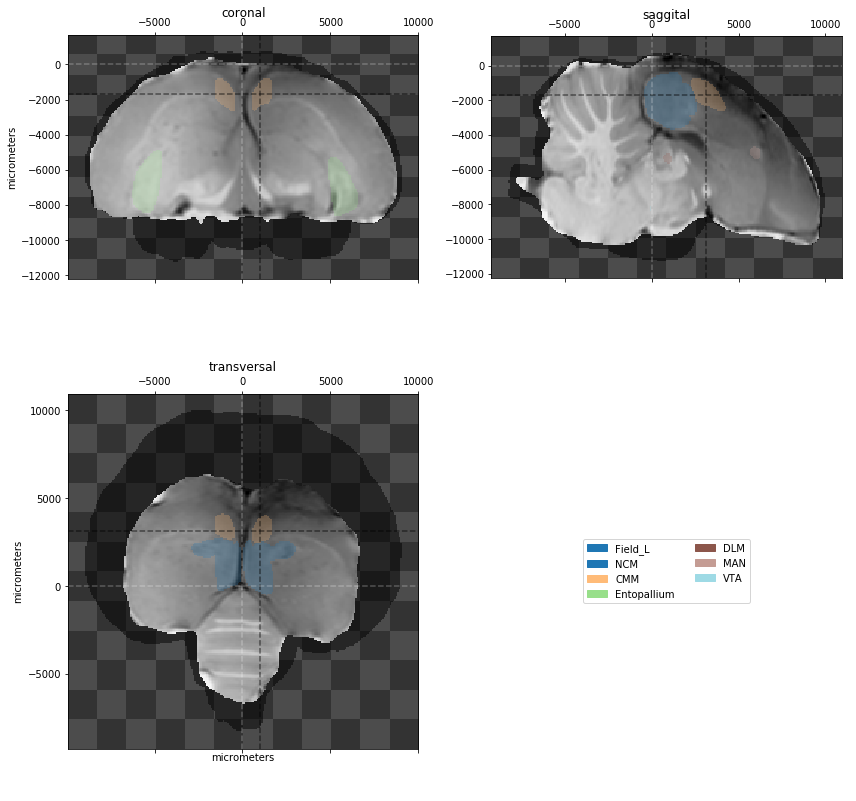

In [15]:
# Gentnerlab coordiates: 2500 um rostral, 500um lateral, 90deg (from horizontal), 1500-2500 deep
nuc_loc_voxels = starling_atlas.region_vox.loc['CMM', 'coords_vox']
plot_location_coordinates(starling_atlas, nuc_loc_voxels, "Nuclei", region_alpha = 0.25, zoom =6);

#### Field L

medial-lateral: 1785.0um | posterior-anterior: 2040.0um | ventral-dorsal: -1955.0um


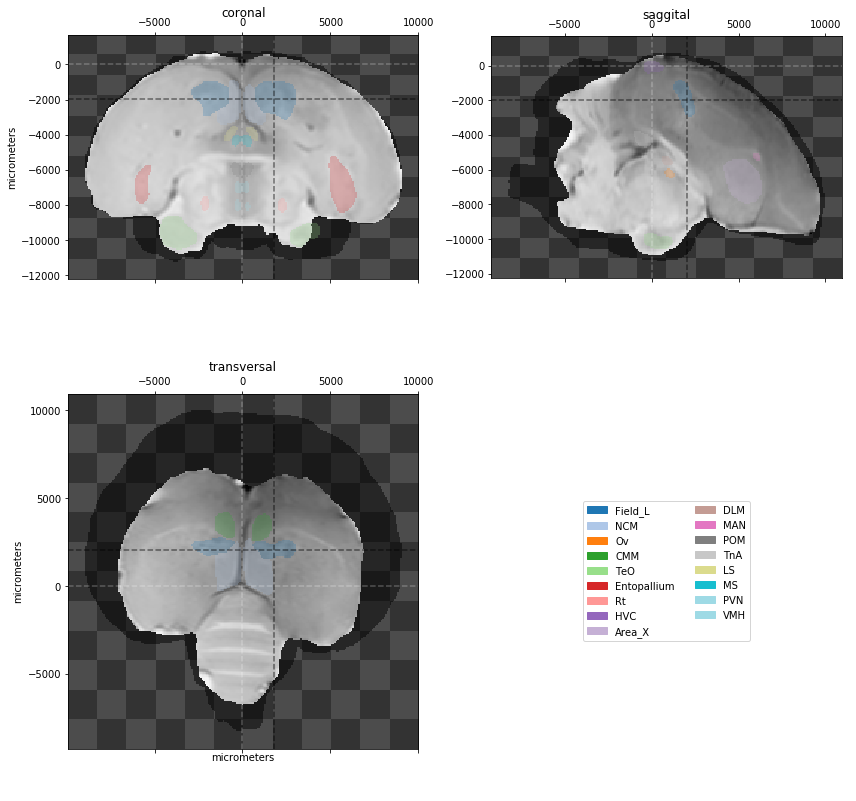

In [16]:
nuc_loc_voxels = starling_atlas.region_vox.loc['Field_L', 'coords_vox']
plot_location_coordinates(starling_atlas, nuc_loc_voxels, "Nuclei", region_alpha = 0.25, zoom =6);

#### MAN

medial-lateral: 1870.0um | posterior-anterior: 6035.0um | ventral-dorsal: -5355.0um


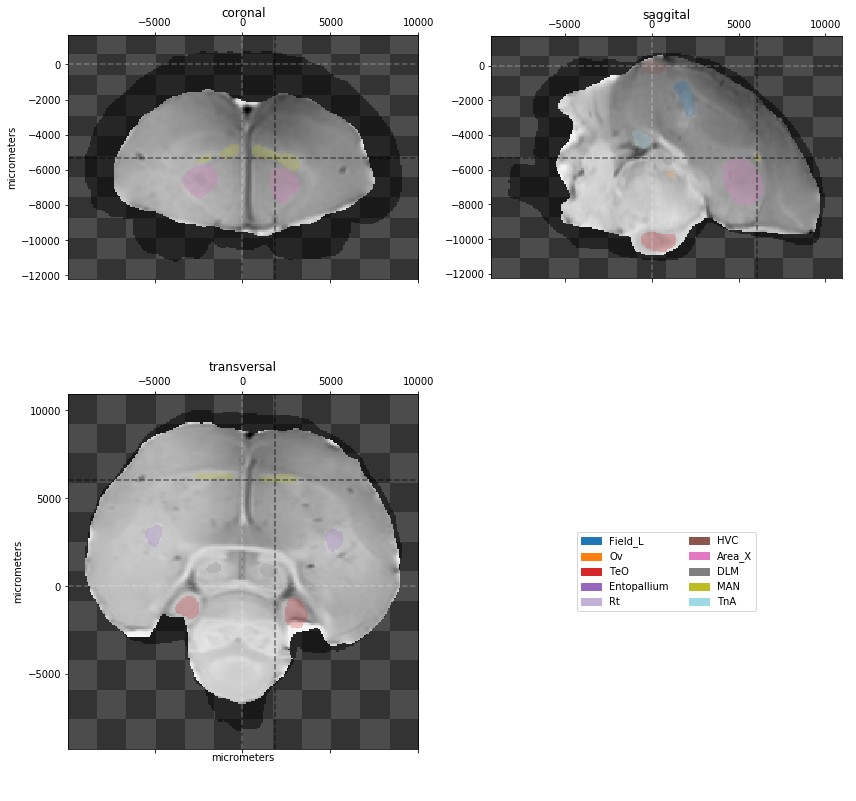

In [17]:
nuc_loc_voxels = starling_atlas.region_vox.loc['MAN', 'coords_vox']
plot_location_coordinates(starling_atlas, nuc_loc_voxels, "Nuclei", region_alpha = 0.25, zoom =6);

#### VTA

medial-lateral: 1105.0um | posterior-anterior: -85.0um | ventral-dorsal: -8330.0um


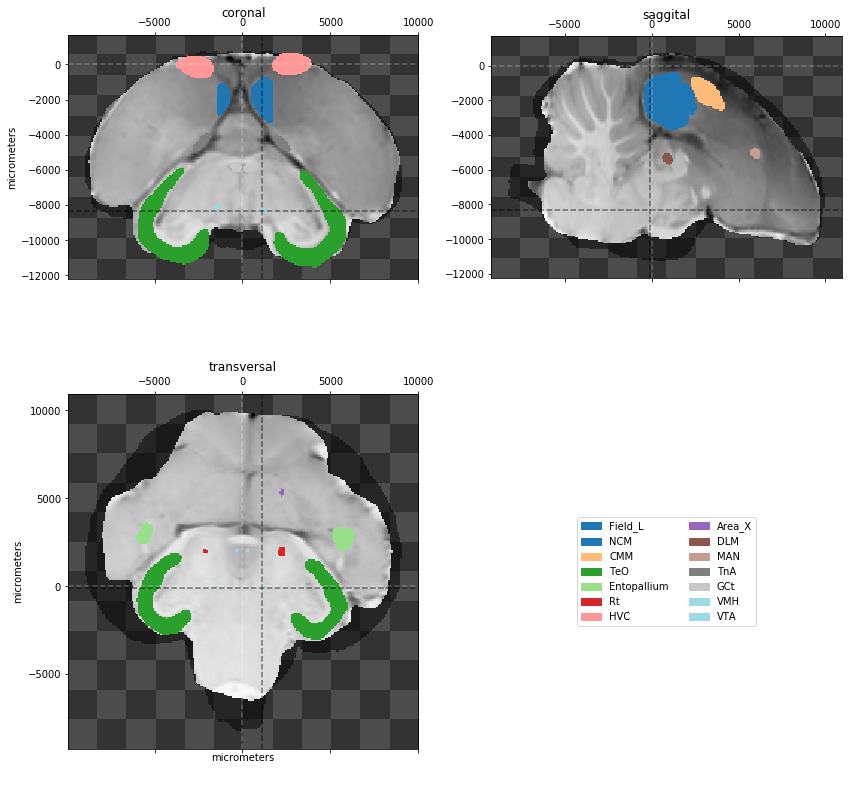

In [18]:
nuc_loc_voxels = starling_atlas.region_vox.loc['VTA', 'coords_vox']
plot_location_coordinates(starling_atlas, nuc_loc_voxels, "Nuclei", region_alpha = 1, zoom =6);

### Example: plotting recording sites

In [19]:
# lateral, rostral, depth
points_to_plot = np.array([
    [948, 2784, -2000],
    [948, 3084, -2300],
    
    [648, 2784, -2000],
    [648, 3084, -2300],
    
    [948, 2784, -2000],
    [948, 3084, -2300],
    
    [648, 2784, -2000],
    [948, 3084, -2300],
])

medial-lateral: 1020.0um | posterior-anterior: 3145.0um | ventral-dorsal: -1700.0um


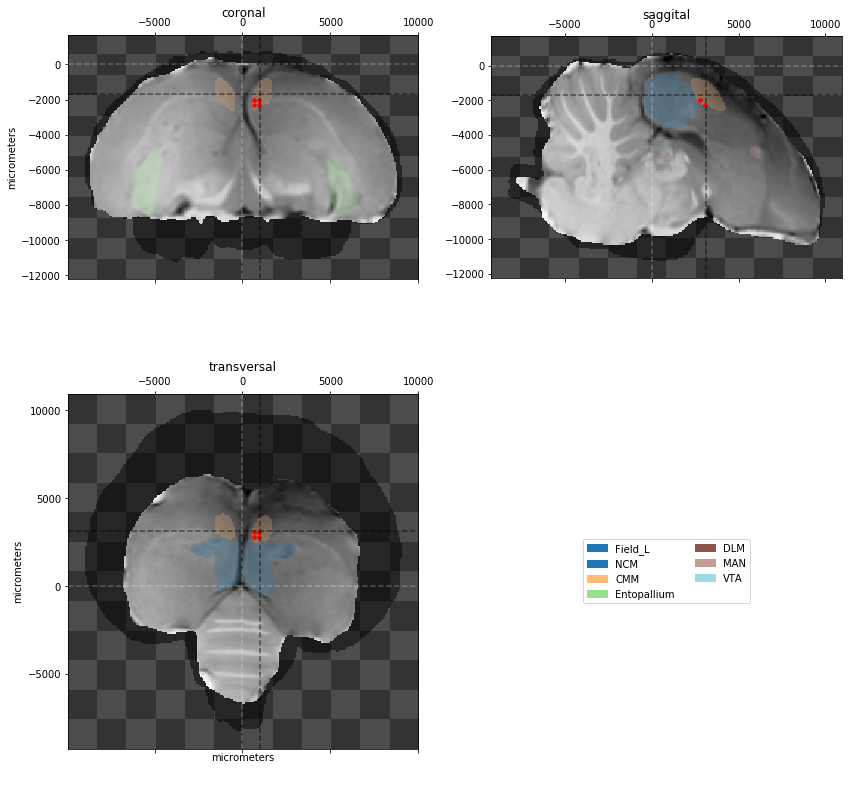

In [21]:
nuc_loc_voxels = starling_atlas.region_vox.loc['CMM', 'coords_vox']
plot_location_coordinates(starling_atlas, nuc_loc_voxels, "Nuclei", points_to_plot=points_to_plot,  region_alpha = 0.25, zoom =6);

### Looking at a new location
- Convert a location in $\mu m$ relative to the y sinus into voxels, then plot that point

In [22]:
# We need to perform an affine transform based on the .img data, then translate to um

# the affine transformation of this image
aff = starling_atlas.voxel_data.loc["Brain", "affine"]
# the atlas' multiplier (this atlas has units at 100*um)
um_mult = starling_atlas.um_mult
# the transform applied to the reference point to get the y sinus
um_transform = starling_atlas.y_sinus_um_transform

In [25]:
# our location of interest
# Gentnerlab coordiates: 2500 um rostral, 500um lateral, 90deg (from horizontal), 1500-2500 deep
location_in_um = {'medial-lateral': 500,'posterior-anterior': 2500,'ventral-dorsal': -2000}
location_in_vox = um_to_vox(aff, location_in_um, um_mult, um_transform)

medial-lateral: -510.0um | posterior-anterior: 2465.0um | ventral-dorsal: -2040.0um


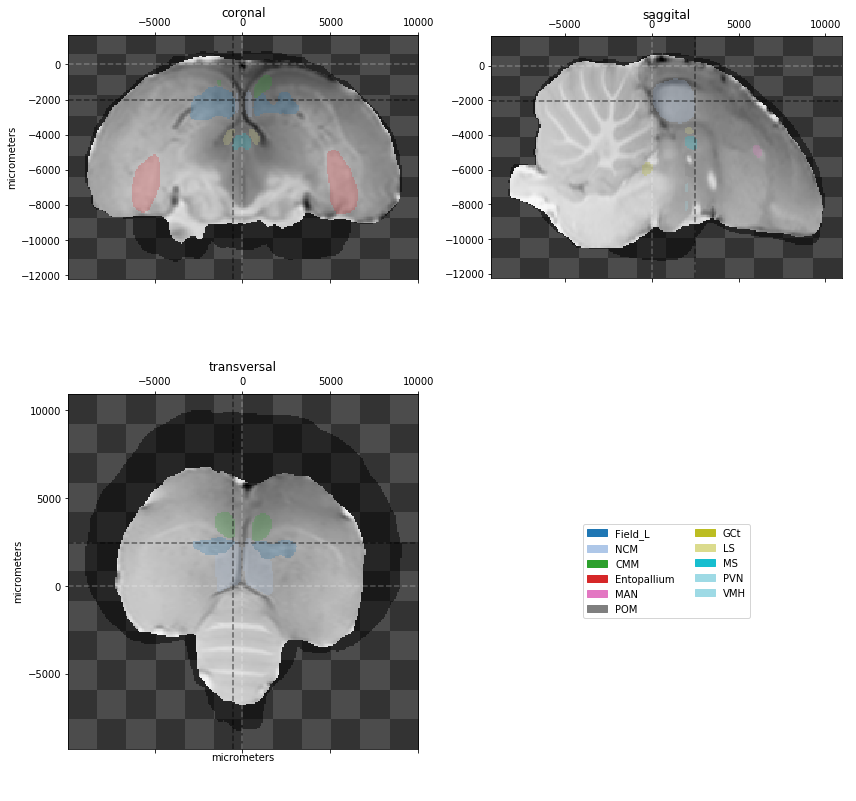

In [27]:
plot_location_coordinates(starling_atlas, location_in_vox, "Nuclei",  region_alpha = 0.25, zoom =6);

According to the brain atlas, CMM is typically more lateral, and a bit more anteriorthan we have found in lab

### Estimate the number of neurons in a region

In [28]:
# Estimate of total number of neurons from https://www.pnas.org/content/113/26/7255/tab-figures-data
starling_n_neurons = 482.50*10**6
starling_n_neurons_std = 88.29*10**6

In [29]:
nucleus = 'CMM'

In [30]:
n_brain_voxels = np.sum(starling_atlas.voxel_data.loc['Brain', 'voxels'])
n_region_voxels = np.sum(starling_atlas.voxel_data.loc['Nuclei', 'voxels']==starling_atlas.brain_labels.loc[nucleus,'label'])
n_region_voxels/n_brain_voxels

0.002446724759487767

In [31]:
estimated_region_num_neurons = int((n_region_voxels/n_brain_voxels) * starling_n_neurons)
estimated_region_num_neurons_std = int((n_region_voxels/n_brain_voxels) * starling_n_neurons_std) 

In [32]:
print(nucleus+" has an estimated {:,}+={:,} neurons".format(estimated_region_num_neurons, estimated_region_num_neurons_std))

CMM has an estimated 1,180,544+=216,021 neurons
